In [1]:
%%time
#importar galeries
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import seaborn as sns

#Valors a canviar al canviar d'any:
estació="Alburquerque"
any=2022
dies_febrer=28
excel=openpyxl.load_workbook("Eraw_ta6_15_202201010000 fins 2022 03 31 00.xlsx")


Wall time: 1min 21s


In [2]:
%%time

tempsup=[]


for fila in range(7, 35050):
    full=excel["full"]
    celdah = full["D" + str(fila)]
    if celdah.value==17:
        celdamin=full["E"+str(fila)]
        if celdamin.value=="00":
            #agafo la temperatura més alta (92.0m) per tenir el mínim d'efecte del terra possible
            celdatemp=full["AJ"+str(fila)]
            temp=celdatemp.value
            tempsup=np.append(tempsup,float(temp))



Wall time: 493 ms


In [3]:
#vull aconseguir la mitjana anual de Dewpoint

dewpoint=[]

for fila in range(7, 35050):
    full=excel["full"]
    celdah = full["D" + str(fila)]
    if celdah.value==17:
        celdamin=full["E"+str(fila)]
        if celdamin.value=="00":
            celdatemp=full["AN"+str(fila)]
            temp=celdatemp.value
            if temp=='*':
                print(fila)
                dewpoint=np.append(dewpoint,np.nan)
            #agafo la temperatura més alta (92.0m) per tenir el mínim d'efecte del terra possible
            else:
                dewpoint=np.append(dewpoint,float(temp))
mitjanadew=np.nanmean(dewpoint)

skewTd = np.genfromtxt('Albuquerque2022_skewTd_00.csv', delimiter=',')
skewTdjunt=np.hstack((mitjanadew,skewTd[1:]))

19948


In [4]:
any=2022

#preparem el temps:
dies=["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
mesos=["gener","febrer","març","abril","maig","juny","juliol","agost","setembre","octubre","novembre","desembre"]
mesos_31dies=["gener","març","maig","juliol","agost","octubre","desembre"]
mesos_30dies=["abril","juny","setembre","novembre"]

a=0
dates=[]
dies_mesos=[]
for mes in mesos:
    if mes in mesos_31dies:
        dimes=31
    elif mes in mesos_30dies:
        dimes=30
    elif mes=="febrer":
        dimes=28
    for i in np.arange(0,dimes):
        dates.append(mes + " " + dies[i])#per fer l'eix X de les gràfiques amb cada dia
    a+=dimes
    dies_mesos=np.append(dies_mesos,a)
print(len(dates))

#i la pressió:
pressions=[770., 700., 610., 500., 400., 300., 200., 150., 100.,  50.,  30.,  20.]

365


In [5]:

Albuquerque2022_00nit = np.genfromtxt('Albuquerque2022_00nit.csv', delimiter=',')
unio=np.vstack((tempsup,Albuquerque2022_00nit[1:,:]))

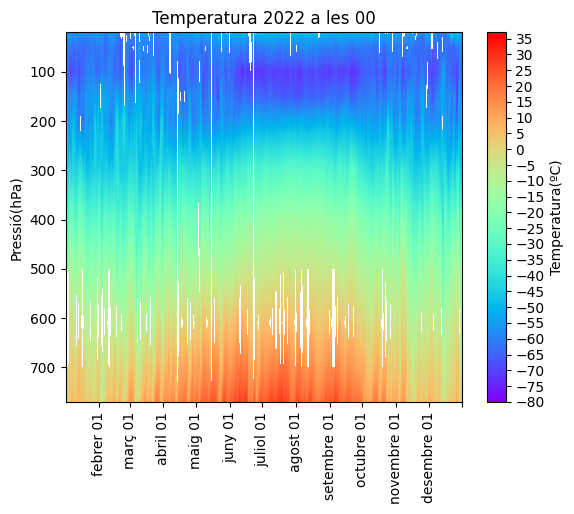

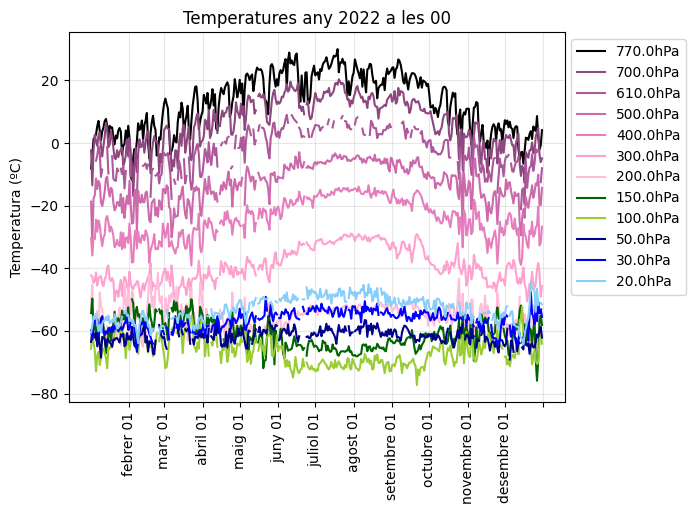

In [6]:

#TIPUS 1
temp_cbar= np.linspace(-80,37,500)
plt.contourf(dates,np.array(pressions, dtype=float),unio,cmap="rainbow",levels=temp_cbar)
plt.title(f"Temperatura {any} a les 00")
plt.ylabel("Pressió(hPa)")
plt.gca().invert_yaxis()
    #rainbow, cool o spring
    
plt.xticks(dies_mesos,rotation=90)
aa=plt.colorbar()
lavels_cbar=np.linspace(-80,35,24)
aa.set_ticks(lavels_cbar)
aa.set_label("Temperatura(ºC)")
plt.show()

#TIPUS 2
#escollim bé els colors
custom_colors = ["k", "#8E477F","#AD589B" , "#CC6AAC","#E67EBD" ,"#FFA1CE" ,"#FFBDDA","darkgreen","yellowgreen","#00008B","#0000FF","#87CEFA","k"]

for i in np.arange(0,len(pressions)):
    plt.plot(dates,unio[i,:], label=f'{pressions[i]}hPa',color=custom_colors[i])

#decoració
plt.title(f"Temperatures any {any} a les 00")
plt.xticks(dies_mesos,rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("Temperatura (ºC)")

plt.grid(alpha=0.3)
plt.show()

In [7]:
Albuquerque2022_skewT_00 = np.genfromtxt('Albuquerque2022_skewT_00.csv', delimiter=',')
skewT=np.hstack((np.mean(tempsup),Albuquerque2022_skewT_00[1:]))


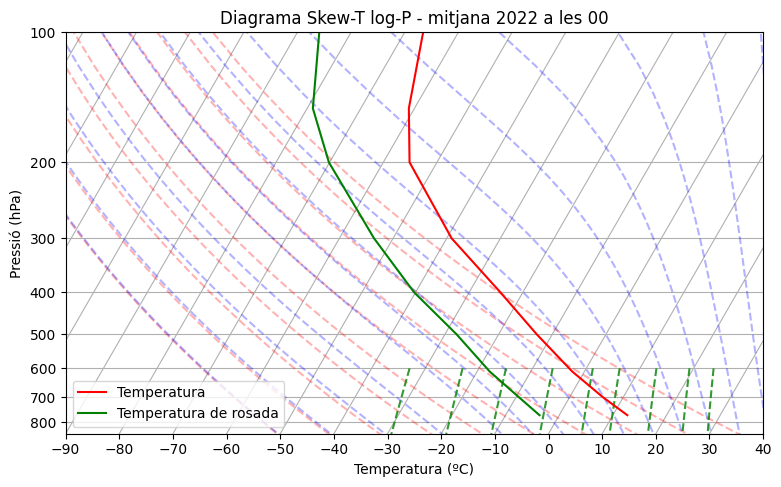

In [8]:
dewpoint=skewTdjunt

# creem el plot:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)
plt.title(f"Diagrama Skew-T log-P - mitjana {any} a les 00")

# grafiquem
skew.plot(pressions, skewT, 'r', label="Temperatura")
skew.plot(pressions, dewpoint, 'g',label="Temperatura de rosada")

# Les gràfiques extres de referència
skew.plot_dry_adiabats(alpha=0.3)#taronja i lila
skew.plot_moist_adiabats(alpha=0.3)#blau equisaturades
skew.plot_mixing_lines()#verdes

# eixos i llegneda
skew.ax.set_ylim(850, 100)
skew.ax.set_xlabel("Temperatura (ºC)")
skew.ax.set_xlim(-90, 40)
skew.ax.set_ylabel("Pressió (hPa)")
plt.legend(loc="lower left")

# ensenyem la gràfica
plt.show()